## Logistic Regression for Imabalanced Dataset

- An imbalanced dataset is one in which the input and the output features ratio's have huge differenece.  
e.g - 99:1, 999:1, etc  

In [56]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [57]:
# generate and plot an imbalanced classification dataset.
from collections import Counter
from sklearn.datasets import make_classification

In [74]:
X, y=make_classification(n_samples=10000, n_features=2, n_clusters_per_class=2, n_redundant=0, weights=[0.99], random_state=10)

In [75]:
X

array([[-1.23960391,  1.51333068],
       [ 0.1432964 , -2.76387971],
       [-1.25624258, -2.3612912 ],
       ...,
       [ 0.20129864,  1.8864287 ],
       [-1.63779328,  0.99830374],
       [-0.6725086 , -1.19203033]], shape=(10000, 2))

In [76]:
Counter(y)

Counter({np.int64(0): 9840, np.int64(1): 160})

Text(0, 0.5, 'Y Datapoints')

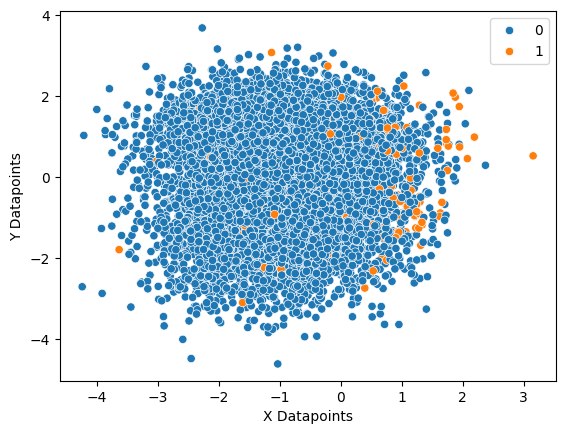

In [77]:
# visualizing the dataset
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)
plt.xlabel("X Datapoints")
plt.ylabel("Y Datapoints")

In [78]:
## Split the data into Train, Test and Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [79]:
# importing the Logistic Regression
from sklearn.linear_model import LogisticRegression

In [80]:
class_weight=[{0:w, 1:y} for w in [1, 10, 50, 100] for y in [1, 10, 50, 100]]
class_weight

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

In [81]:
## Hyperparameter Tuning
model=LogisticRegression()
penalty = ['l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

In [82]:
params = dict(penalty=penalty,
     C=c_values,
     solver=solver,
     class_weight = class_weight)

In [83]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()
grid = GridSearchCV(estimator=model, param_grid=params, scoring="accuracy", cv = cv)

In [85]:
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [86]:
grid.best_params_

{'C': 100,
 'class_weight': {0: 100, 1: 50},
 'penalty': 'l1',
 'solver': 'liblinear'}

In [87]:
y_pred = grid.predict(X_test)

In [88]:
# performance metrices
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [89]:
score = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
c_report = classification_report(y_test, y_pred)

print("Accuracy_Score :", score)
print(cm)
print("===================== Classification Report ======================")
print(c_report)

Accuracy_Score : 0.9812
[[2453    0]
 [  47    0]]
===================== Classification Report ======================
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2453
           1       0.00      0.00      0.00        47

    accuracy                           0.98      2500
   macro avg       0.49      0.50      0.50      2500
weighted avg       0.96      0.98      0.97      2500

